### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [2]:

# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [3]:
# Investigating the missing values
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


For the follow up action the values in target columns are in the format that must be changed.

In [4]:
#converting the target columns values.
cc_apps[13] = cc_apps[13].map({'+':1 , '-':0})

It seems there is no missing value. Taking a deep look in columns, shows the missing values mentioned as "?".

In [5]:
# Replacing the question marks with Nan 
cc_apps.replace('?',np.nan, inplace= True)
cc_apps.isna().sum().sort_values(ascending= False)

0     12
1     12
5      9
6      9
3      6
4      6
2      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
dtype: int64

As we saw in the dataset, some of the columns in numeric are in object. These such a columns must be changed to numeric.

In [6]:
# converting the numeric columns that are in object format.

col_to_convert = [1, 2, 7, 12, 13]
cc_apps[col_to_convert] = cc_apps[col_to_convert].apply(pd.to_numeric, errors = 'coerce')
cc_apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 75.6+ KB


Now we need to handling the missing values. Although the number of missing values in the dataset are less than %5 and we can drop all of them, we prefere to impute them.

In [7]:
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,1


In [8]:
cc_apps.isna().sum().sort_values()

2      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
3      6
4      6
5      9
6      9
0     12
1     12
dtype: int64

In this step we have to divide the data set into train and test sections. before that we need to categories the data into categorical and numerical data sets. Then we can handling the missing data by applying the imputation from sklearn. Note that for the test part it must be just transform (not fit transform).

In [9]:
# divide the data set into train and test
X_cat = cc_apps.drop([1, 2, 7, 10, 12, 13], axis=1)
X_num = cc_apps.drop([0, 3, 4, 5, 6, 8, 9, 10, 11, 13], axis=1)
Y = cc_apps[13]
x_cat_train , x_cat_test, y_train, y_test = train_test_split(X_cat, Y, test_size = 0.2, random_state = 50)
x_num_train, x_num_test, y_train, y_test = train_test_split(X_num, Y, test_size = 0.2, random_state= 50)

# missing values imputation for categorical and numeric data seperately
imp_cat = SimpleImputer (strategy = "most_frequent")
imp_num = SimpleImputer()

x_cat_train = imp_cat.fit_transform(x_cat_train)
x_cat_test = imp_cat.transform(x_cat_test)

x_num_train = imp_num.fit_transform(x_num_train)
x_num_test = imp_num.transform(x_num_test)

# turning the categorical columns to dummy varaibles using OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
encoder.fit(x_cat_train)
x_cat_train_encoded = encoder.transform(x_cat_train)
x_cat_test_encoded = encoder.transform(x_cat_test)

# concatinating the dumy columns with the numeric culumns
x_train = np.append(x_cat_train_encoded , x_num_train, axis = 1)
x_test = np.append(x_cat_test_encoded, x_num_test, axis = 1)

In [10]:
# check the shape
print (x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(552, 42)
(138, 42)
(552,)
(138,)


Now we can go for runnig models. As the first one, we select the KNN one. The paremeter that must be tunne is the number of neighbors. It will be done by ploting the different numbers for neighbors.

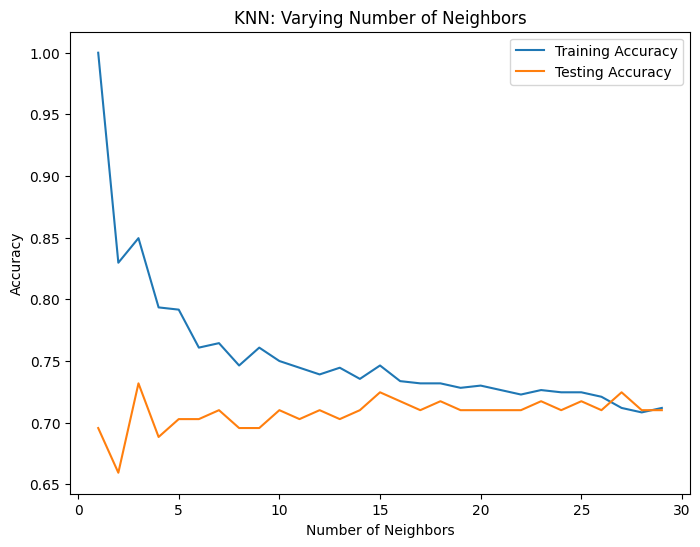

In [11]:
train_accuracy = {}
test_accuracy = {}
neighbors = np.arange(1,30)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    train_accuracy[n] = knn.score(x_train, y_train)
    test_accuracy[n] = knn.score(x_test, y_test)

plt.figure(figsize = (8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracy.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracy.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

The best performance for KNN model is 74% accuracy for setting 3 for the nummber of neighbors. Now we can test the logistic regression model. 

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        77
           1       0.83      0.89      0.86        61

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



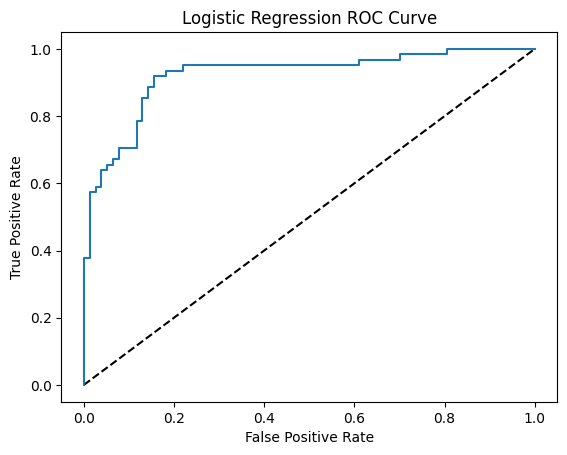

In [14]:
# ignoring the warning messages
import warnings
warnings.filterwarnings("ignore")

#running logistic regression model based on the default setting for hyperparameters
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

This model has a better performance in comparision with the KNN model. We can tune the hyperparameters and get even the better performance.

In [15]:
param_grid = {"C": [0.01, 0.1, 1, 2, 5, 10, 20, 50, 100], 
              "penalty":['l1', 'l2'], "solver": ["liblinear", "saga", "lbfgs", "newton-cg","saga"],
              'max_iter':  [100, 200, 300]}
logreg_cv = GridSearchCV(estimator=logreg, param_grid= param_grid)
logreg_cv.fit(x_train, y_train)
print("Best Hyperparameter:", logreg_cv.best_params_)

Best Hyperparameter: {'C': 20, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


The result shows that Best Hyperparameter: {'C': 90.01, 'penalty': 'l2', 'solver': 'liblinear'}. lets apply them to the model.

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.82      0.80      0.81        61

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



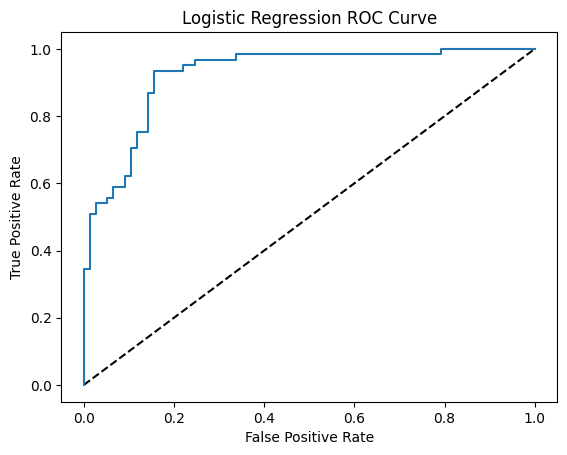

In [16]:
# setting the hyperparameters based on the grids search
logreg = LogisticRegression(C=20, penalty='l2', solver='liblinear', max_iter=100)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

It seems that setting is the best. But when we apply the dafault setting fo hyperparameters we get better results:

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        77
           1       0.83      0.89      0.86        61

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



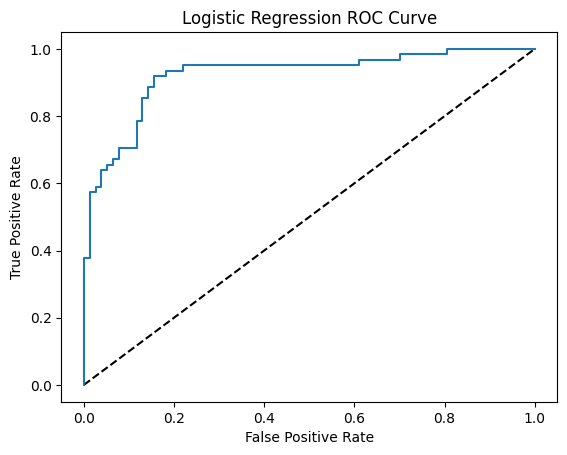

In [17]:
# setting the hyper parameter based on the default setting of logistic regression:
logreg = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

The problem is related to the scaling. lets do the StandardScaler and run the grid search again:

In [18]:
# Running the model again with standard scaler
logreg = LogisticRegression()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
logreg.fit(x_train_scaled, y_train)
y_pred = logreg.predict(x_test_scaled)
param_grid = {"C": [0.01, 0.1, 1, 2, 5, 10, 20, 50, 100], 
              "penalty":['l1', 'l2'], "solver": ["liblinear", "saga", "lbfgs", "newton-cg","saga"],
              'max_iter':  [100, 200, 300]}
logreg_cv = GridSearchCV(estimator=logreg, param_grid= param_grid)
logreg_cv.fit(x_train_scaled, y_train)
print("Best Hyperparameter:", logreg_cv.best_params_)

Best Hyperparameter: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.88      0.86      0.87        77
           1       0.83      0.85      0.84        61

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138



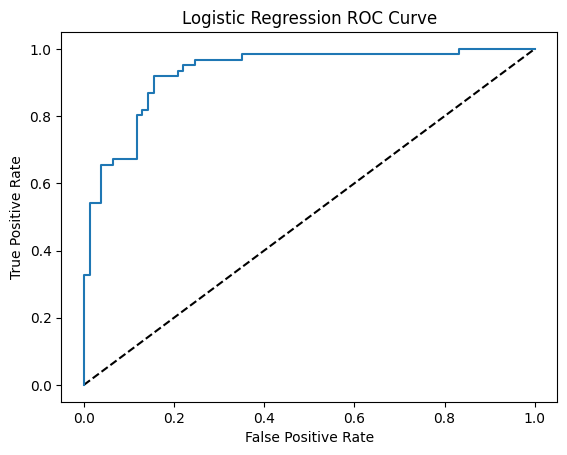

In [19]:
# running the model with the best parameter selection in the grid search fot the scaled variables.
logreg = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', max_iter=100)
logreg.fit(x_train_scaled, y_train)
y_pred = logreg.predict(x_test_scaled)
print(classification_report(y_test, y_pred))
y_pred_prob = logreg.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

For a comparison, we will run the default model with scaled variable

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.82      0.82      0.82        61

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



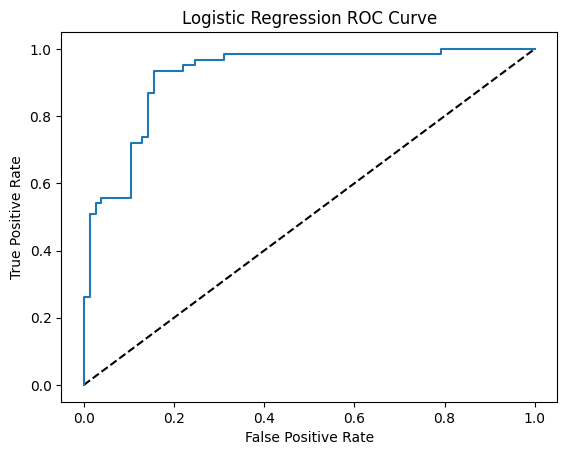

In [20]:
# Running the model with dafault setting on scaled varables.
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)
y_pred = logreg.predict(x_test_scaled)
print(classification_report(y_test, y_pred))
y_pred_prob = logreg.predict_proba(x_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

As we saw, with the scaled variables we can reach to the best setting for hyperparameters.Now we can see that this is the most robust model for our data.